In [1]:
!pip install -U tensorflow_datasets

In [2]:
from __future__ import absolute_import, division, print_function

In [3]:
!pip install ipywidgets

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt
# progress bar
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

In [5]:
dataset, metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)

In [6]:
train_dataset,test_dataset = dataset['train'],dataset['test']

In [7]:
train_dataset

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [8]:
test_dataset

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [9]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [10]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
              'Sneaker','Bag','Ankel_boot']

In [11]:
class_names

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankel_boot']

In [12]:
num_training_examples = metadata.splits['train'].num_examples
num_testing_examples = metadata.splits['test'].num_examples

In [13]:
num_testing_examples

10000

In [14]:
num_training_examples

60000

In [15]:
print("Numbers of training Examples: {}".format(num_training_examples))
print("Numbers of testing Examples: {}".format(num_testing_examples))

Numbers of training Examples: 60000
Numbers of testing Examples: 10000


In [16]:
def normalize(images,labels):
    images = tf.cast(images,tf.float32)
    images /= 255
    return images,labels

In [17]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

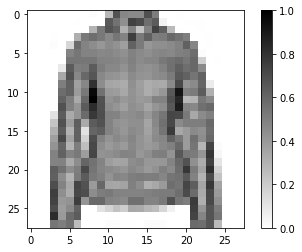

In [18]:
for image,label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

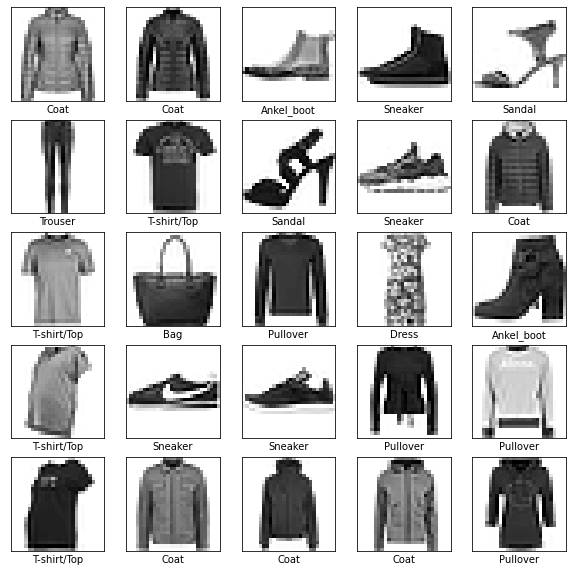

In [19]:
plt.figure(figsize=(10,10))
i = 0
for (image,label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image,cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i+=1
plt.show()

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
BATCH_SIZE = 32


In [23]:
train_dataset = train_dataset.repeat().shuffle(num_training_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [24]:
model.fit(train_dataset,epochs=25,steps_per_epoch=math.ceil(num_training_examples/BATCH_SIZE))

Epoch 1/25
1875/1875 [==============================] - 14s 4ms/step - loss: 0.4924 - accuracy: 0.8269
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3702 - accuracy: 0.8654
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3359 - accuracy: 0.8782
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3109 - accuracy: 0.8870
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2920 - accuracy: 0.8930
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2749 - accuracy: 0.8986
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2628 - accuracy: 0.9019
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2566 - accuracy: 0.9051
Epoch 9/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2463 - accuracy: 0.9087
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.23

In [25]:
test_loss, test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_testing_examples/BATCH_SIZE))

313/313 [==============================] - 2s 4ms/step - loss: 0.3902 - accuracy: 0.8834


In [26]:
for test_images,test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [27]:
predictions.shape

(32, 10)

In [28]:
predictions[0]

array([1.7053020e-09, 1.0852603e-07, 3.8576865e-04, 1.1073192e-08,
       9.9746847e-01, 5.6992310e-16, 2.1455947e-03, 1.3898734e-18,
       5.9240429e-10, 1.6298777e-14], dtype=float32)

In [29]:
np.argmax(predictions[0])

4

In [30]:
np.argmax(predictions[0])
np.argmax(predictions[0])

4

In [31]:
def plot_image(i,predictions_array, true_labels,images):
    predictions_array,true_labels,img = predictions_array[i],true_labels[i],images[i]
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(img[...,0],cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_labels:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_labels]),color=color)

In [32]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

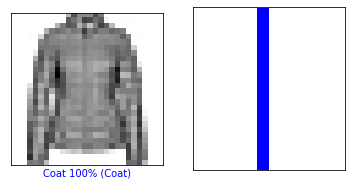

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

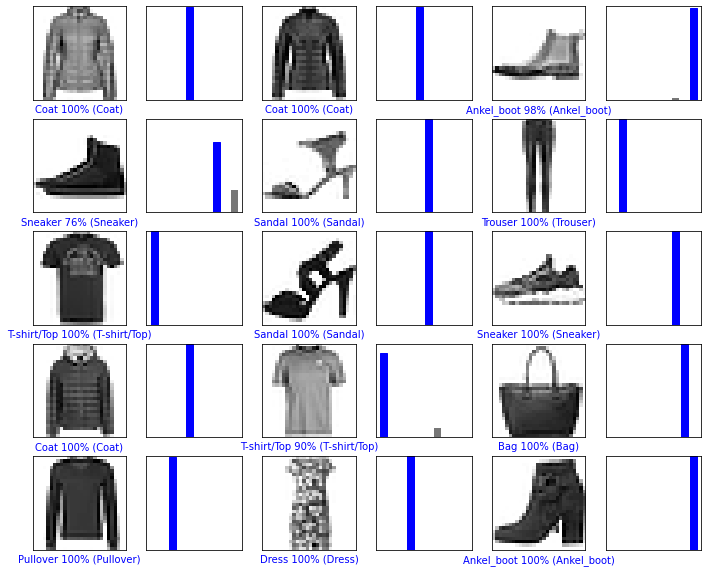

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)

In [41]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [42]:
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [43]:
prediction_single = model.predict(img)
print(prediction_single)

[[1.70530201e-09 1.08526031e-07 3.85768828e-04 1.10731495e-08
  9.97468472e-01 5.69923101e-16 2.14560097e-03 1.38986278e-18
  5.92403182e-10 1.62987774e-14]]


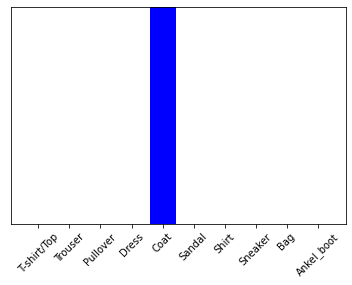

In [44]:
plot_value_array(0,prediction_single,test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)